## Importing the required libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf

In [13]:
dir_path = "C:/Users/prana/Projects/Bone_break_classification/data/Bone break classification" # Path of taining data

In [14]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
from keras.optimizers import *

## Importing the Dataset

In [15]:
# load the train data

train_data = tf.keras.utils.image_dataset_from_directory(
    dir_path,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40
)

#load the test data
validation_data = tf.keras.utils.image_dataset_from_directory(
    dir_path,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=42
)

Found 1129 files belonging to 10 classes.
Using 1017 files for training.
Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [16]:
# Inspect class names
class_names = train_data.class_names
print("Class names:", class_names)

Class names: ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [17]:
className = glob(dir_path + '/*' )
numberOfClasses = len(className)
print("Number Of Class: ",numberOfClasses)

Number Of Class:  10


In [18]:
# data preprocessing
def preprocess(img):
    img = tf.cast(img, "float32") / 255.0
    return img

train_dataset = train_data.map(lambda x, y: (preprocess(x), y))
val_dataset = validation_data.map(lambda x, y: (preprocess(x), y))

In [19]:
# get train data and labels
x_train = []
y_train = []

for images, labels in train_dataset:
    #append train data to x_train
    x_train.append(images.numpy())
    
    #append labels to y_train
    y_train.append(labels.numpy())
    
# concatenate all the batches to get the full list
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [20]:
# get val data and labels

x_val = []
y_val = []

for images, labels in val_dataset:
    #append train data to x_train
    x_val.append(images.numpy())
    
    #append labels to y_train
    y_val.append(labels.numpy())
    
# concatenate all the batches to get the full list
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [21]:
x_train.shape

(1017, 256, 256, 3)

In [22]:
NUM_CLASSES = len(class_names)

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = tf.keras.utils.to_categorical(y_val, NUM_CLASSES)

## Model Training

In [23]:
model = tf.keras.Sequential([
    Conv2D(filters=32,kernel_size=(3,3),strides=2,padding="same",input_shape=(256,256, 3)),
    BatchNormalization(momentum=0.9),
    LeakyReLU(0.2),
    Dropout(rate=0.2),
    
    Conv2D(64,3,strides=2,padding="same"),
    BatchNormalization(momentum=0.9),
    LeakyReLU(0.2),
    Dropout(rate=0.2),
    
    Conv2D(128,3,strides=2,padding="same"),
    BatchNormalization(momentum=0.9),
    LeakyReLU(0.2),
    Dropout(rate=0.2),
    
    Conv2D(256,3,strides=2,padding="same"),
    BatchNormalization(momentum=0.9),
    LeakyReLU(0.2),
    Dropout(rate=0.2),
    
    Flatten(),
    BatchNormalization(momentum=0.9),
    LeakyReLU(0.2),
    Dropout(rate=0.2),

    Dense(units=numberOfClasses, activation="softmax")              # 10 nodes with softmax activation for binary classification
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 65536)               │         262,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 65536)               │              

 Total params: 1,307,850 (4.99 MB)

 Trainable params: 1,175,818 (4.49 MB)

 Non-trainable params: 132,032 (515.75 KB)

In [24]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy','Precision','Recall','AUC'])

In [25]:
# A callback  
earlystop = tf.keras.callbacks.EarlyStopping(
                           monitor='val_loss',       # which monitors the Validation loss
                           min_delta=0,              # and stops the training if the loss doesnt improve
                           patience=5,               # for 5 consecutive turns 
                           verbose=1,
                           restore_best_weights=True # and restores best weights
                           )

In [26]:
# fit the model, log the results
callbacks = [earlystop]
epochs = 10

history = model.fit(x_train,
            y_train,
            validation_data = (x_val, y_val),
            shuffle=True,
            batch_size=32,
            epochs = epochs,
            callbacks=callbacks)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 449ms/step - AUC: 0.5245 - Precision: 0.1293 - Recall: 0.0995 - accuracy: 0.1224 - loss: 6.8018 - val_AUC: 0.5713 - val_Precision: 0.1163 - val_Recall: 0.0446 - val_accuracy: 0.1339 - val_loss: 2.9002
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - AUC: 0.6171 - Precision: 0.2313 - Recall: 0.1890 - accuracy: 0.2217 - loss: 4.9398 - val_AUC: 0.6356 - val_Precision: 0.2250 - val_Recall: 0.1607 - val_accuracy: 0.2143 - val_loss: 4.2074
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 435ms/step - AUC: 0.7096 - Precision: 0.3354 - Recall: 0.2928 - accuracy: 0.3288 - loss: 4.2381 - val_AUC: 0.6556 - val_Precision: 0.2778 - val_Recall: 0.2679 - val_accuracy: 0.2768 - val_loss: 5.9175
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 440ms/step - AUC: 0.7680 - Precision: 0.4278 - Recall: 0.3789 - accuracy: 0.4028 - loss: 3.4093 - val_AUC: 0.7286 - val_Precision: 0.3661 - val_Recall: 0.3661 - val_accuracy: 0.3661 - val_loss: 5.9323
Epoch 5/10
32/32 ━━━━━━━━━━━

## Model evaluation

In [27]:
model.evaluate(x_val, y_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - AUC: 0.9710 - Precision: 0.8838 - Recall: 0.8704 - accuracy: 0.8704 - loss: 0.9665


[0.8287529945373535,
 0.8660714030265808,
 0.8738738894462585,
 0.8660714030265808,
 0.9756368398666382]

In [28]:
# list all data in history
print(history.history.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss'])


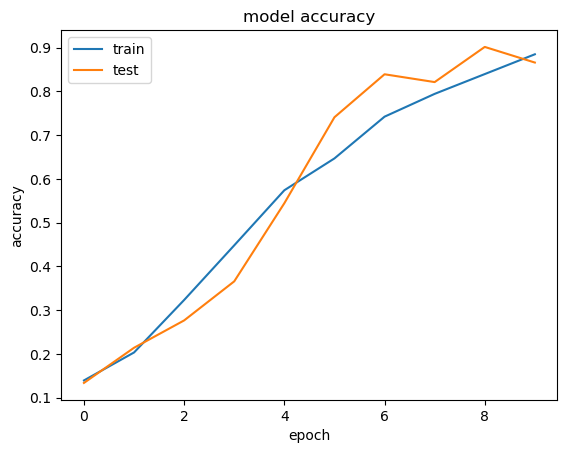

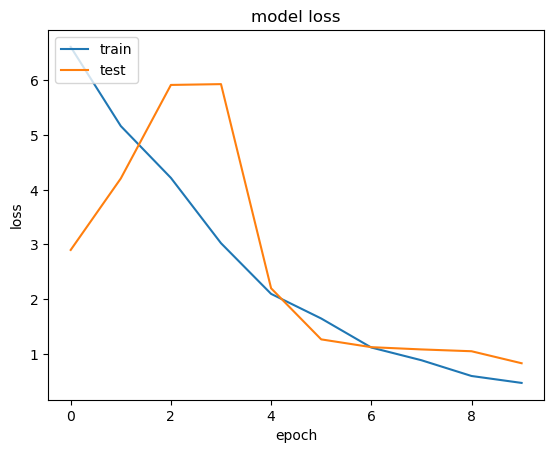

In [29]:
# summarize history for accuracy
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Custom predictions

In [30]:
preds = model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


In [31]:
CLASSES = np.array(class_names)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_val, axis=-1)]

In [32]:
def display_preds_act(n=10, figsize=(15,3)):
    
    indices = np.random.choice(range(len(y_val)), n)
    
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i, idx in enumerate(indices):
        img = x_val[idx]
        ax = fig.add_subplot(1, n, i + 1)
        ax.axis("off")
        ax.text(0.5, -0.35, "pred = " + str(preds_single[idx].split(" ")[0][:4]), fontsize=10, ha="center", transform=ax.transAxes)
        ax.text(0.5, -0.7, "act = " + str(actual_single[idx].split(" ")[0][:4]), fontsize=10, ha="center", transform=ax.transAxes)
        ax.imshow(img)

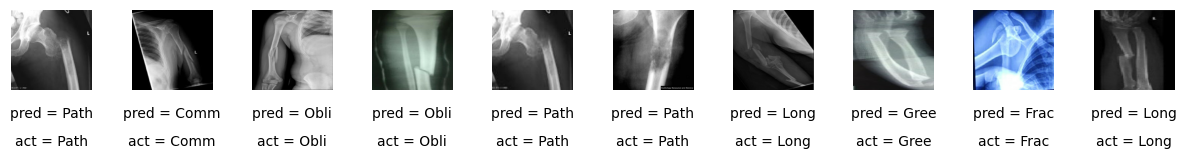

In [33]:
display_preds_act()

In [34]:
# A custorm prediction function that 
def predict_func(img):
    plt.figure(figsize=(6,4))                          # plots the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))   # as a coloured figure
    img = cv2.resize(img, (256, 256))                  
    img = np.reshape(img, [-1, 256, 256,3])            # resizes it to fit the input layer of our classifier model
    result = model.predict(img)                        # and predicts using the model
    print(f"The bone in image is -> {CLASSES[np.argmax(result, axis=-1)]}")
  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
The bone in image is -> ['Comminuted fracture']


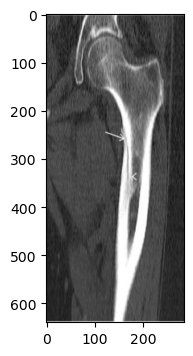

In [35]:
test_img = cv2.imread("C:/Users/prana/Projects/Bone_break_classification/data/Bone Break Classification/Longitudinal fracture/Test/1-s2-0-S235204771630003X-gr2_jpg.rf.23497906a4b6a3106d193648e244cc6e.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The bone in image is -> ['Comminuted fracture']


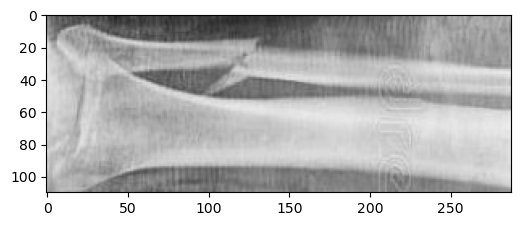

In [36]:
test_img = cv2.imread("C:/Users/prana/Projects/Bone_break_classification/data/Bone Break Classification/Comminuted Fracture/Test/leg-displacement-two-projections-white-background-vertical-image-x-248620996_jpg.rf.15fe0e9e9b93d8870cbc808e994bf03e.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The bone in image is -> ['Comminuted fracture']


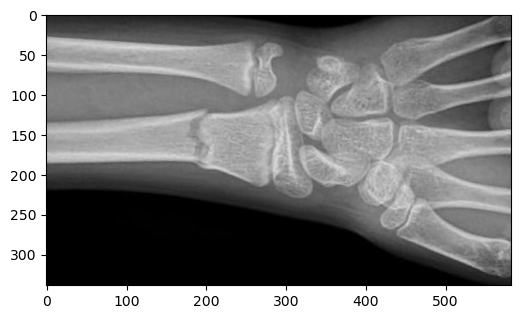

In [37]:
test_img = cv2.imread("C:/Users/prana/Projects/Bone_break_classification/data/Bone Break Classification/Greenstick fracture/Test/15ff6b9162cf7c04caad3fbd4f4a2e_gallery_jpg.rf.bdcd5db0dd212b125b361a70ddf63265.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The bone in image is -> ['Avulsion fracture']


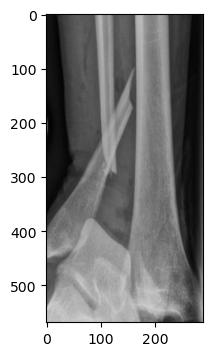

In [38]:
test_img = cv2.imread("C:/Users/prana/Projects/Bone_break_classification/data/Bone Break Classification/Fracture Dislocation/Test/1-s2-0-S1268773120301892-gr1_rf.a87a221ae10f0f11bf1e72867576588b.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The bone in image is -> ['Comminuted fracture']


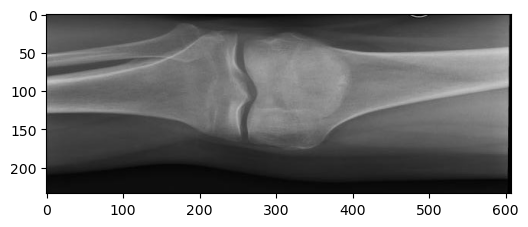

In [39]:
test_img = cv2.imread("C:/Users/prana/Projects/Bone_break_classification/data/Bone Break Classification/Hairline Fracture/Test/2995c0750ed98208c238f4b6ad_jumbo_jpg.rf.f3c327c6d4893a32a5bdf9d01f425028.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The bone in image is -> ['Impacted fracture']


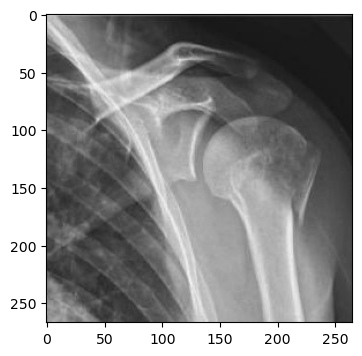

In [40]:
test_img = cv2.imread("C:/Users/prana/Projects/Bone_break_classification/data/Bone Break Classification/Impacted Fracture/Test/3-s2-0-B9781782424499000042-f04-05-9781782424499_jpg.rf.697fc1f3f837a4facd89b17281dc3843.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The bone in image is -> ['Comminuted fracture']


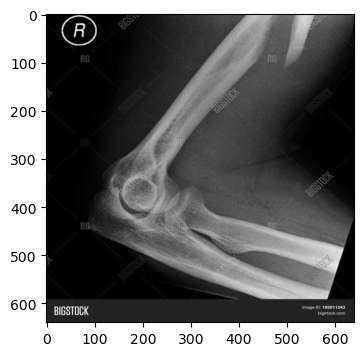

In [41]:
test_img = cv2.imread("C:/Users/prana/Projects/Bone_break_classification/data/Bone Break Classification/Spiral Fracture/Test/192811243_jpg.rf.93989b0917199eb629709b79bf516da9.jpg")
predict_func(test_img)

### Saving the model

In [42]:
# save the model in a binary format
import os
import joblib

if not os.path.exists("C:/Users/prana/Projects/Bone_break_Classification/model"):
    os.mkdir("C:/Users/prana/Projects/Bone_break_Classification/model")
joblib.dump(model,"C:/Users/prana/Projects/Bone_break_Classification/model/fc_model.pkl")
print("Successfully Completed !")

TypeError: 'NoneType' object is not iterable

In [43]:
tf.keras.models.save_model(model,'my_model2.hdf5')

In [44]:
!pip install streamlit

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.5 MB 16.8 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/8.5 MB 9.1 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.5 MB 7.8 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.5 MB 7.8 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.5 MB 7.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.5 MB 5.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.5 MB 5.1 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.5 MB 5.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.0/8.5 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 2.0/8.5 MB 4.9 MB/s eta 0:00:02
   --------- -----

In [73]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('my_model2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
          Bone Fracture classification
         """
         )

file = st.file_uploader("Please upload an Xray Image", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (180,180)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an Xray Image")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


Overwriting app.py


In [95]:
!pip install pyngrok

In [75]:
!ngrok authtoken 2gjNBTdxpnyk9DLjhMHTklfl2LU_7qBoPysb1fQyKxcVbBbiA

Authtoken saved to configuration file: C:\Users\prana\AppData\Local/ngrok/ngrok.yml


In [98]:
!pip install pyngrok
from pyngrok import ngrok
import subprocess

# Start the Streamlit app in the background
process = subprocess.Popen(['streamlit', 'run', 'app.py'], shell=True)

# Create a public URL using ngrok
url = ngrok.connect(port=8501)
print(f'Public URL: {url}')

# Keep the script running to maintain the ngrok tunnel
try:
    process.wait()
except KeyboardInterrupt:
    process.terminate()
    ngrok.disconnect(url)
    ngrok.kill()


ModuleNotFoundError: No module named 'pyngrok'

In [101]:
!start cmd /c "streamlit run app.py --server.enableXsrfProtection false"


In [102]:
!pip install tensorflow_hub

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 16.8 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 9.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.7 MB 7.0 MB/s eta 0:00:01


In [108]:
import streamlit as st
from PIL import Image, ImageOps 
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
from tensorflow.keras import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax 
import os
import h5py

st.header("Image class predictor")

2024-05-21 00:19:50.722 
  command:

    streamlit run C:\Users\prana\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [105]:
def main():
    file_uploaded=st.file_uploader("Choose the file", type = ['jpg', 'png', 'jpeg'])
    if file_uploaded is not None:
        image=Image.open(file_uploaded)
        figure=plt.figure()
        plt.imshow(image)
        plt.axis('off')
        result=predict_class(image)
        st.write(result)
        st.pyplot(figure)

In [106]:
def predict_class(image):
    classifier_model = tf.keras.models.load_model('Downloads/my_model2.hdf5')
    shape=((128, 128,3))
    model = tf.keras. Sequential (hub [hub. KerasLayer (classifier_model, input_shape=shape)])
    test_image=image.resize((128, 128))
    test_image = preprocessing.image.img_to_array(test_image)
    test_image = test_image/255.0
    test_image = np.expand_dims (test_image, axis= 0) 
    class_names = ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']
    predictions = model.predict(test_image)
    scores = tf.nn.softmax (predictions[0])
    scores = scores.numpy()
    image_class=class_names [np.argmax(scores)]
    result = "The image uploaded is: {}".format(image_class) 
    return result

In [107]:
!curl -O [https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip]

curl: (3) bad range in URL position 2:
[https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip]
 ^


In [109]:
get_ipython().system_raw('.ngrok http 8501 &')

In [111]:
sudo apt update
sudo apt install python3


SyntaxError: invalid syntax (3340575757.py, line 1)

In [112]:
import subprocess
import json

# Run the curl command to fetch ngrok tunnels data
curl_process = subprocess.Popen(['curl', '-s', 'http://localhost:4040/api/tunnels'], stdout=subprocess.PIPE)
curl_output, _ = curl_process.communicate()

# Parse the JSON output
data = json.loads(curl_output.decode('utf-8'))

# Extract public URL from the tunnels data
public_url = data['tunnels'][0]['public_url']

# Print the public URL
print("Execute the next cell and then go to the following URL:", public_url)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)